### Find the most important features

In [42]:
#Import relevant packages:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['figure.titlesize'] = 35
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featureDf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files//labelled/labelsnew.npy')

#Use the RandomForest method for the OneVsRestClassifier and specify hyper-parameters:
randForest = sklearn.multiclass.OneVsRestClassifier(sklearn.ensemble.RandomForestClassifier())

clf = sklearn.multiclass.OneVsRestClassifier(estimator=sklearn.ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

# #Fit the model using the full data set and pull the names of the features as strings from the dataframe:
# fitmodel = clf.fit(preProcFeats, preProcLabels)

# featureStrs = featureDf.columns.values

# fimps = []
# features = []

# #Create a list with each element one of the feature importance arrays for one of the estimators:
# for idx in np.arange(8):
#     importance = fitmodel.estimators_[idx].feature_importances_
#     fimps.append(importance)
    
# featureidxs = np.array([])

# for i in np.arange(10):
    
#     #Append next highest importance features to new features array & force feature to be ignored for :
#     for idx in np.arange(8):
#         fimp = fimps[idx]
#         maxargs = np.argmax(fimp)
#         maxargs = maxargs.astype(int)
#         featureidxs = np.append(featureidxs, maxargs).astype(int)    
#         fimp[maxargs] = -1
#         fimps[idx] = fimp                
    
# #Make sure no feature indices are repeated & create new feature list:
# featureidxs = np.unique(featureidxs).astype(int)
# featurez = featureStrs[featureidxs]
# print featurez
    
# #print features   

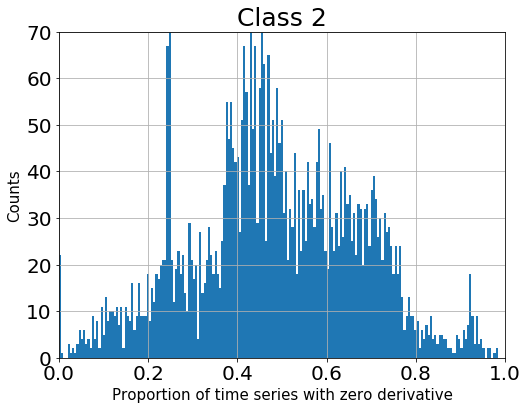

In [52]:
labelDf = labelledDf[labelledDf['Label'] == 2]

labelDf.hist(column = 'pctZeroDeriv', bins = 200, figsize = (8,6), xlabelsize = 20, ylabelsize = 20) 
plt.title('Class 2')
plt.xlabel('Proportion of time series with zero derivative')
plt.ylabel('Counts')
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.ylim(0,70)
plt.xlim(0,1)
plt.savefig('graphs/pctzerodivc2.png')

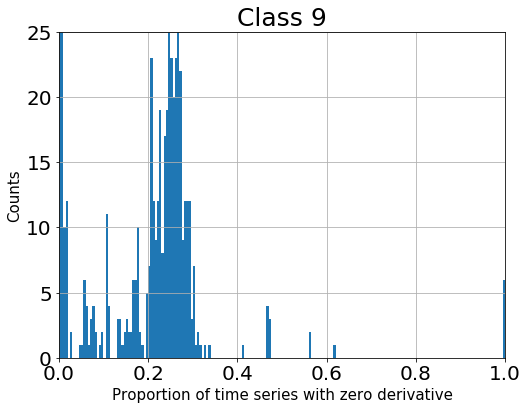

In [46]:
labelDf = labelledDf[labelledDf['Label'] == 9]

labelDf.hist(column = 'pctZeroDeriv', bins = 200, figsize = (8,6), xlabelsize = 20, ylabelsize = 20) 
plt.title('Class 9')
plt.xlabel('Proportion of time series with zero derivative')
plt.ylabel('Counts')
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.ylim(0,25)
plt.xlim(0,1)
plt.savefig('graphs/pctzerodivc9.png')

## Plot a stacked histogram with each class a different colour

/home/inigo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/inigo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


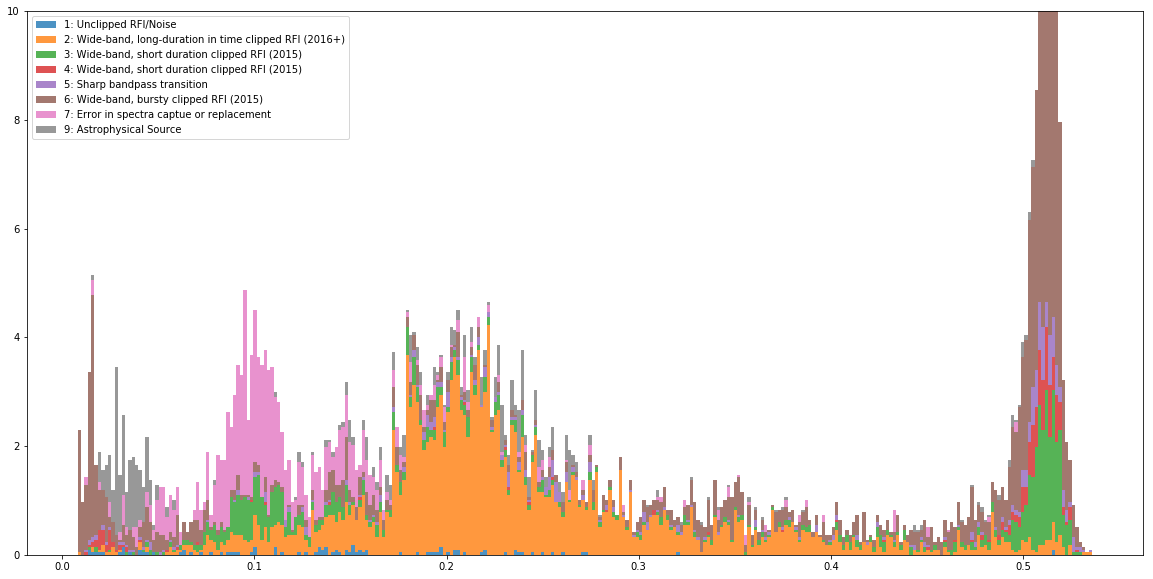

In [2]:
labels = np.array([1,2,3,4,5,6,7,9])
featlist = []

for label in labels:
    ndf = labelledDf[labelledDf['Label'] == label]

    featcol = ndf.as_matrix(columns=['GaussianTestslsD'])
    featlist.append(featcol)

labellegend = '1: Unclipped RFI/Noise', '2: Wide-band, long-duration in time clipped RFI (2016+)', \
'3: Wide-band, short duration clipped RFI (2015)', '4: Wide-band, short duration clipped RFI (2015)', \
'5: Sharp bandpass transition', '6: Wide-band, bursty clipped RFI (2015)', \
'7: Error in spectra captue or replacement', '9: Astrophysical Source'

plt.figure(figsize=(20,10))
plt.hist(featlist, bins = 300, normed = True, stacked = True, alpha = 0.8, label=labellegend)
#plt.yscale('log')
plt.ylim((0,10))
plt.legend()

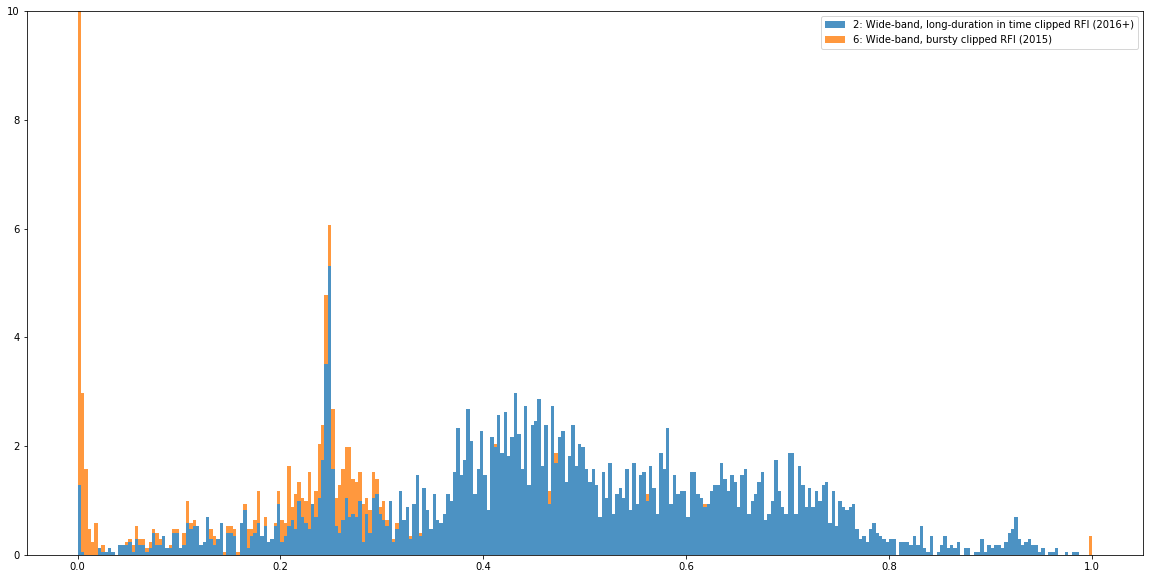

In [14]:
labels = np.array([2,9])
featlist = []

for label in labels:
    ndf = labelledDf[labelledDf['Label'] == label]

    featcol = ndf.as_matrix(columns=['pctZeroDeriv'])
    featlist.append(featcol)
    
labellegend = '2: Wide-band, long-duration in time clipped RFI (2016+)', '6: Wide-band, bursty clipped RFI (2015)'

plt.figure(figsize=(20,10))
plt.hist(featlist, bins = 300, normed = True, stacked = True, alpha = 0.8, label=labellegend)
#plt.savefig('graphs/lilliefors-test.png')
plt.ylim((0,10))
plt.legend()